In [1]:
import numpy as np
import tensorflow as tf
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

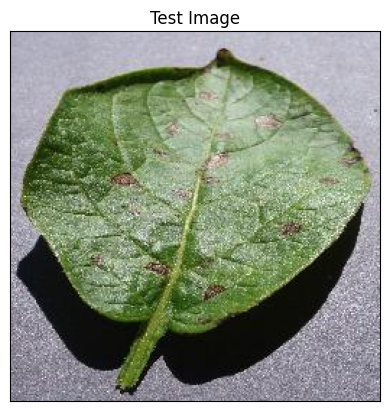

In [4]:
#Test Image Visualization
import cv2
image_path = 'test/PotatoEarlyBlight5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


In [6]:
print(predictions)

[[2.2065997e-06 3.5491301e-09 2.2531939e-10 1.8394446e-07 2.9501981e-10
  5.5586757e-10 7.1207665e-11 9.7353892e-10 2.0377298e-08 1.7449606e-13
  1.7421414e-12 8.7784984e-14 3.0724270e-11 3.0480986e-11 8.9357102e-13
  3.3327969e-12 2.6844483e-11 4.9309097e-13 8.5541245e-09 1.7275120e-09
  9.9998343e-01 9.5840264e-08 2.9062676e-07 2.5481178e-11 6.1712296e-10
  1.3730389e-08 2.0668503e-10 7.0346307e-10 1.2691141e-13 8.7708805e-11
  3.0134509e-06 1.6194777e-08 8.0872869e-06 1.1900051e-13 6.9261530e-09
  8.6054185e-15 2.6079687e-14 2.5300267e-06]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


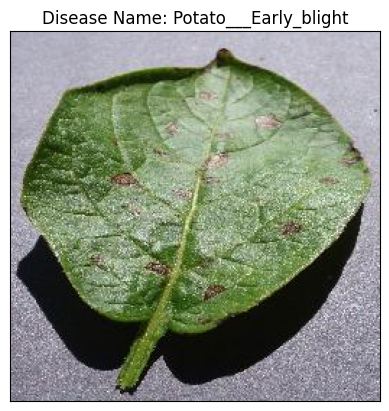

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()